In [ ]:
%pip install git+https://github.com/sarverott/laughing-computing-machine.git --force-reinstall --upgrade --no-cache-dir

import tickable

Processing /home/sarverott/__WORKSHOP/forge/Apokryf_Institute_of_Technomantic_Research/laughing-computing-machine
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tickable: filename=tickable-0.2.0-py3-none-any.whl size=13015 sha256=1ebc0889f47245e8772d04c7bf18d94ade1705a1a028c68ef110420ab91ddb4a
  Stored in directory: /tmp/pip-ephem-wheel-cache-irp22vu1/wheels/d5/91/02/f06736188fd12fa44957303ad1cffb3fca5de8939ff4514a98
Successfully built tickable
  Attempting uninstall: tickable
    Found existing installation: tickable 0.2.0
    Uninstalling tickable-0.2.0:
      Successfully uninstalled tickable-0.2.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from deap import creator, base, tools, algorithms
import random

import tickable.helpers
from tickable.genealogers import chaos_evaluate
from tickable.plots import plot_first_move_preference
from tickable.plots import plot_genome_similarity
from tickable.plots import game_predictions
from tickable.plots import plot_fitness_3d
from tickable.plots import plot_fitness_over_time
from tickable.plots import plot_all_statistics
from tickable.plots import plot_all_statistics
from tickable.plots import plot_tactic_effectiveness
from tickable.plots import plot_tactic_histogram
from tickable.resolvers import games_record, build_tactic_index

#games_record = []

In [3]:

# Przygotowanie środowiska DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_perm", random.sample, range(9), 9)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_perm)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Losowa funkcja oceny — tylko do symulacji wizualizacji
# def dummy_evaluate(individual):
#     return (random.uniform(0, 1),)
#toolbox.register("evaluate", dummy_evaluate)

toolbox.register("evaluate", chaos_evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# --- Symulacja ewolucji + agregacja statystyk ---
pop = toolbox.population(n=30)


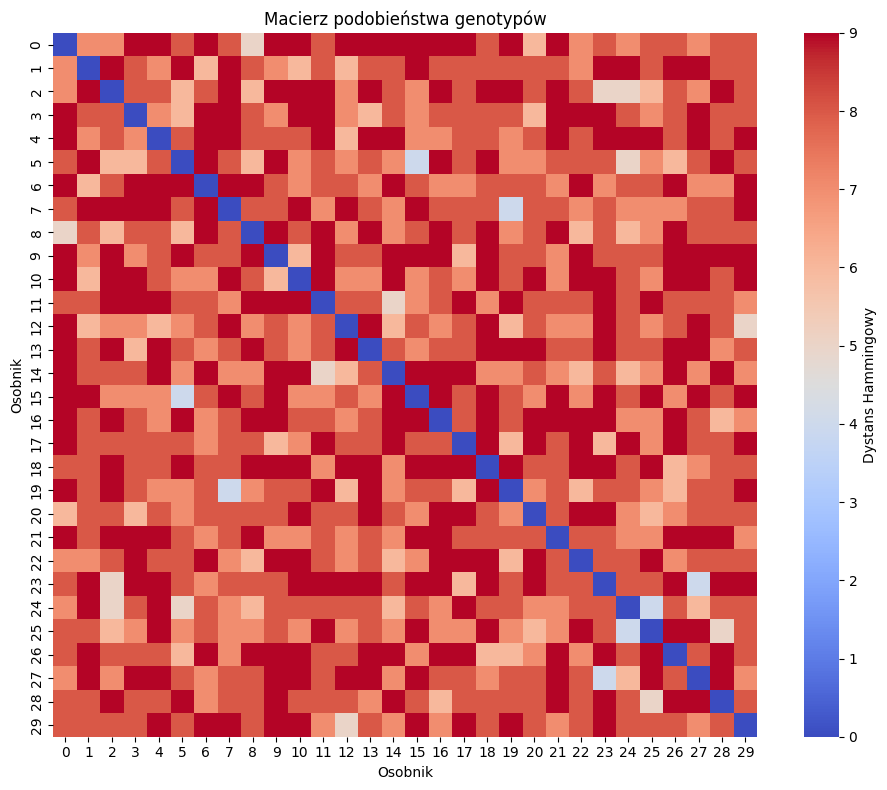

In [4]:

plot_genome_similarity(pop)


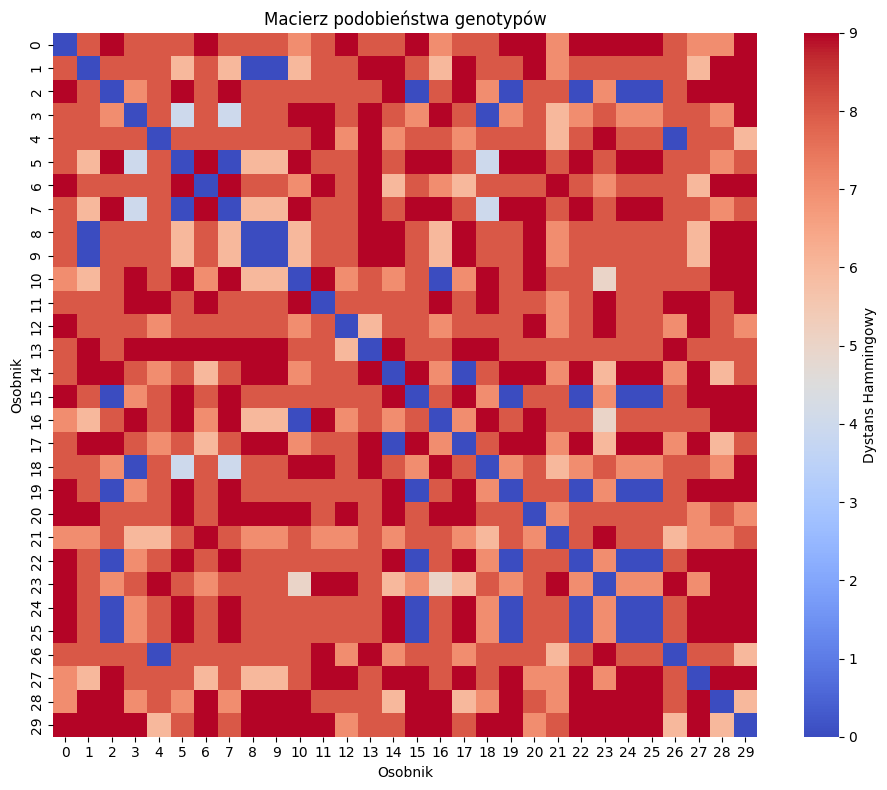

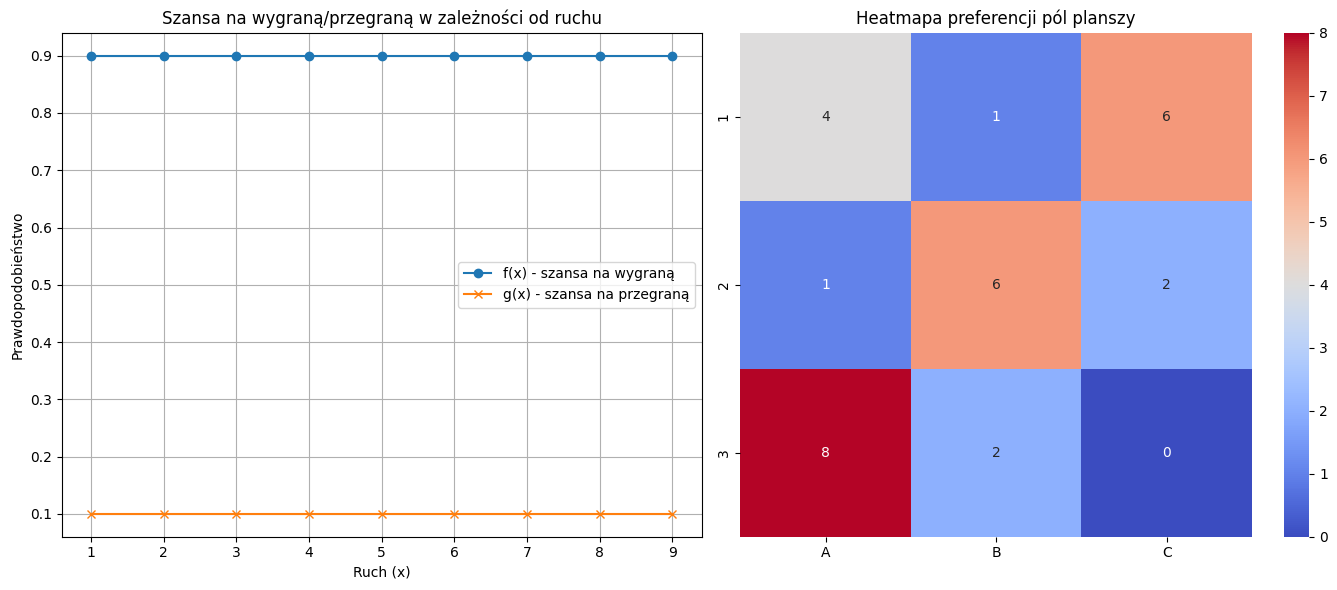

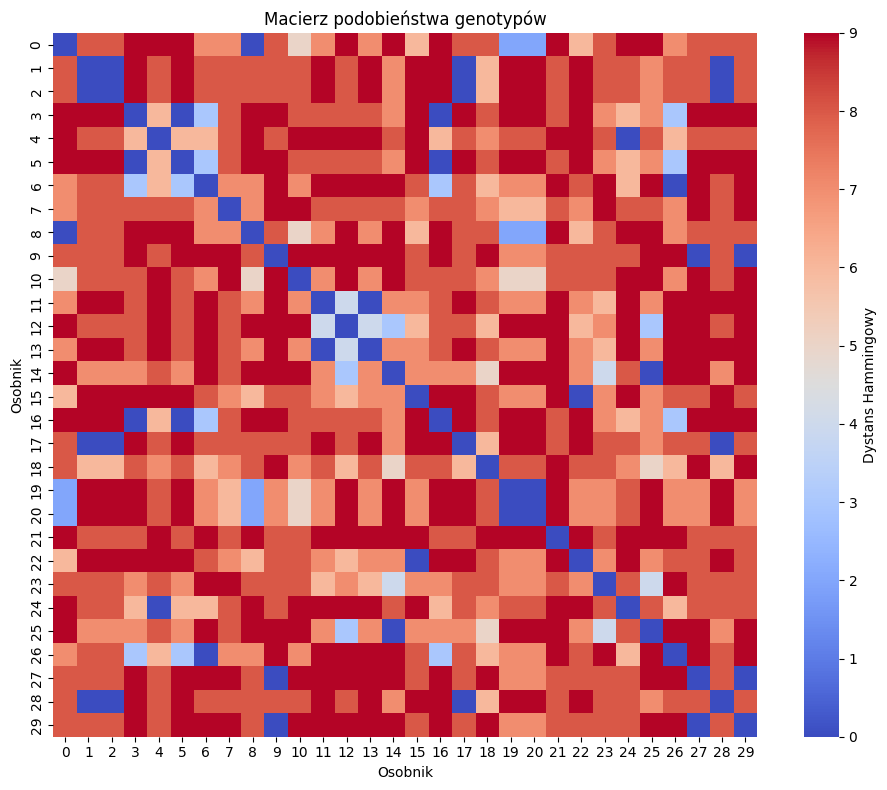

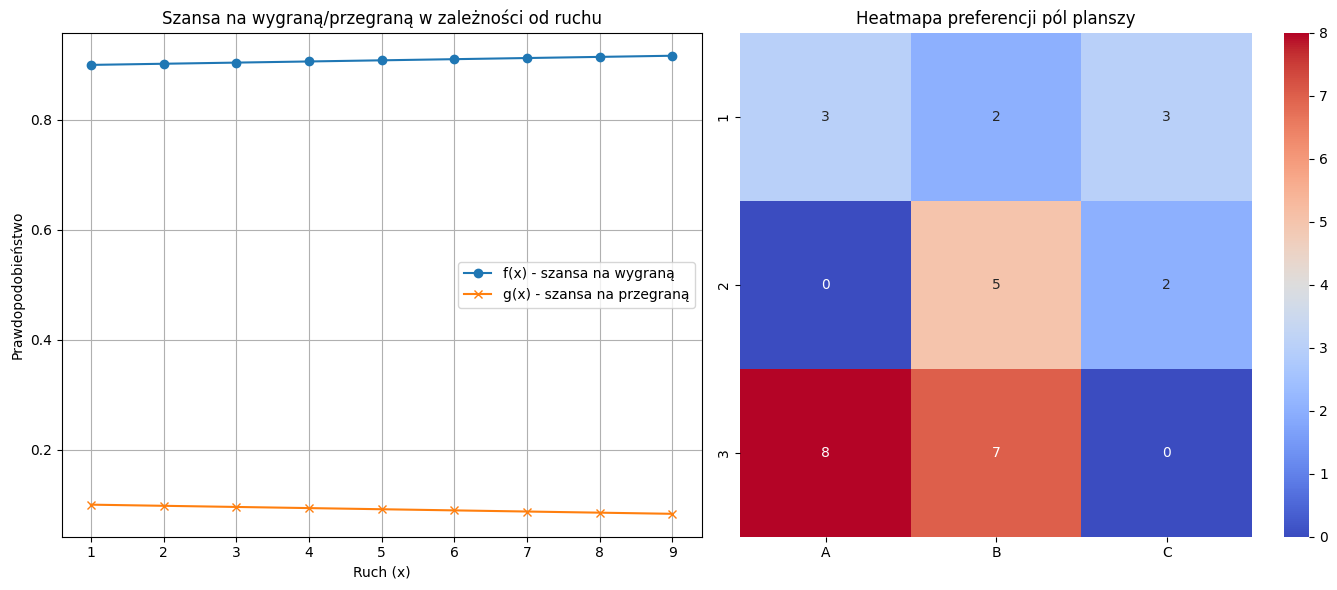

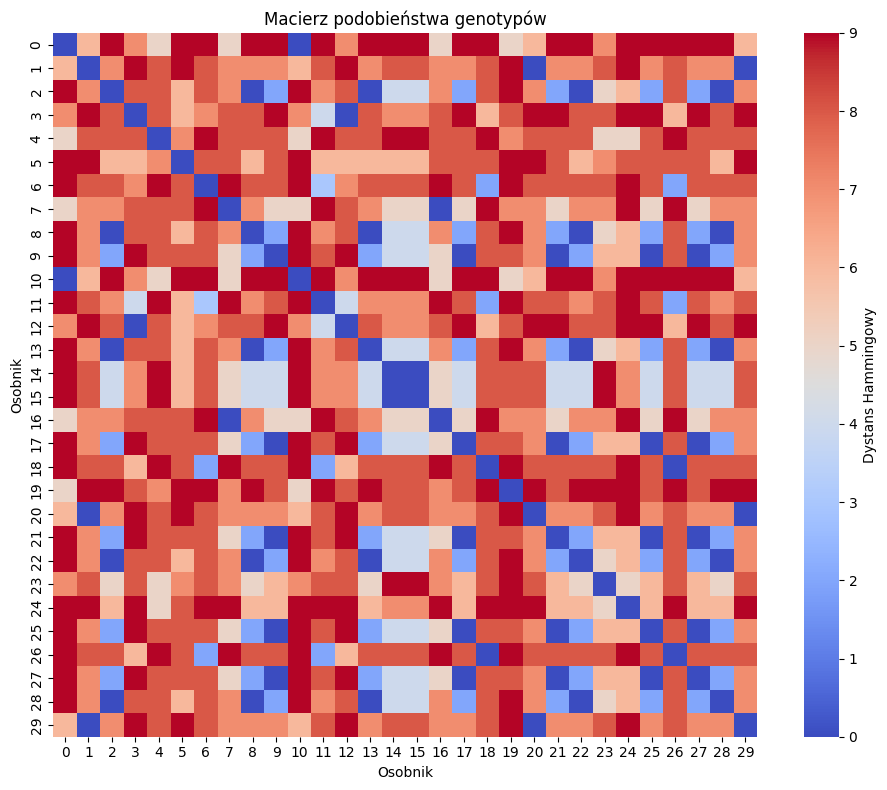

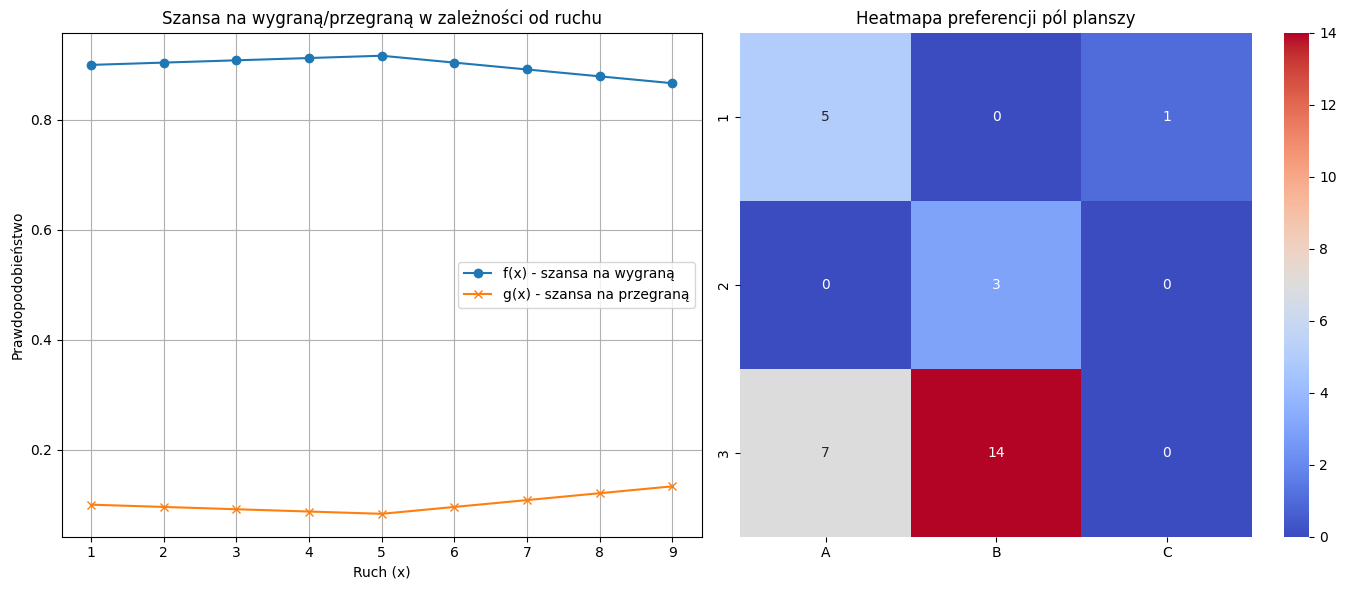

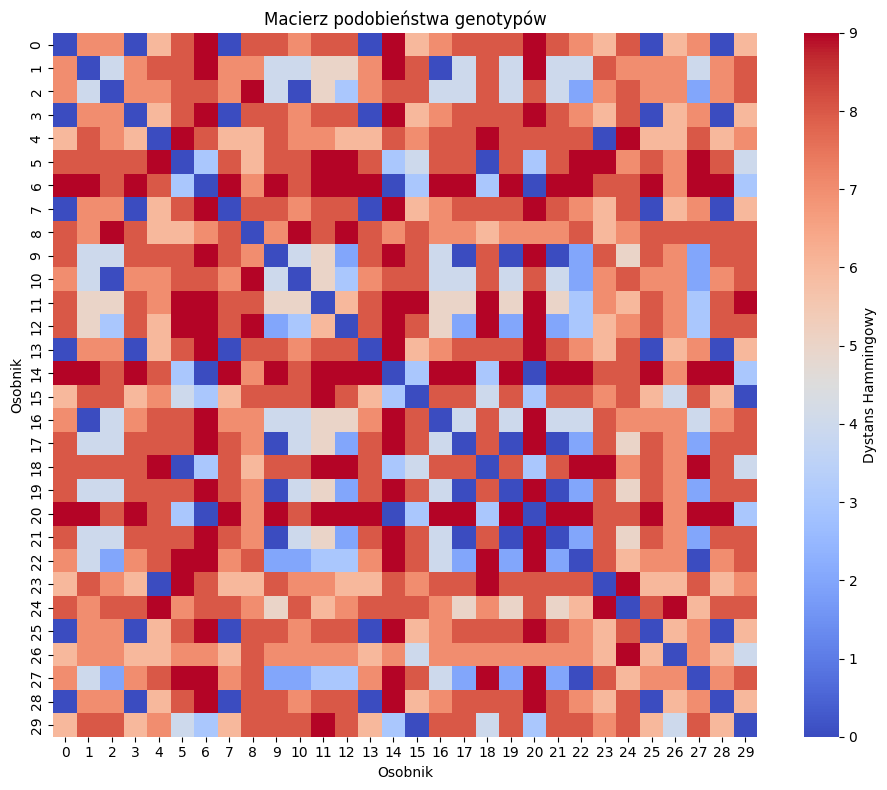

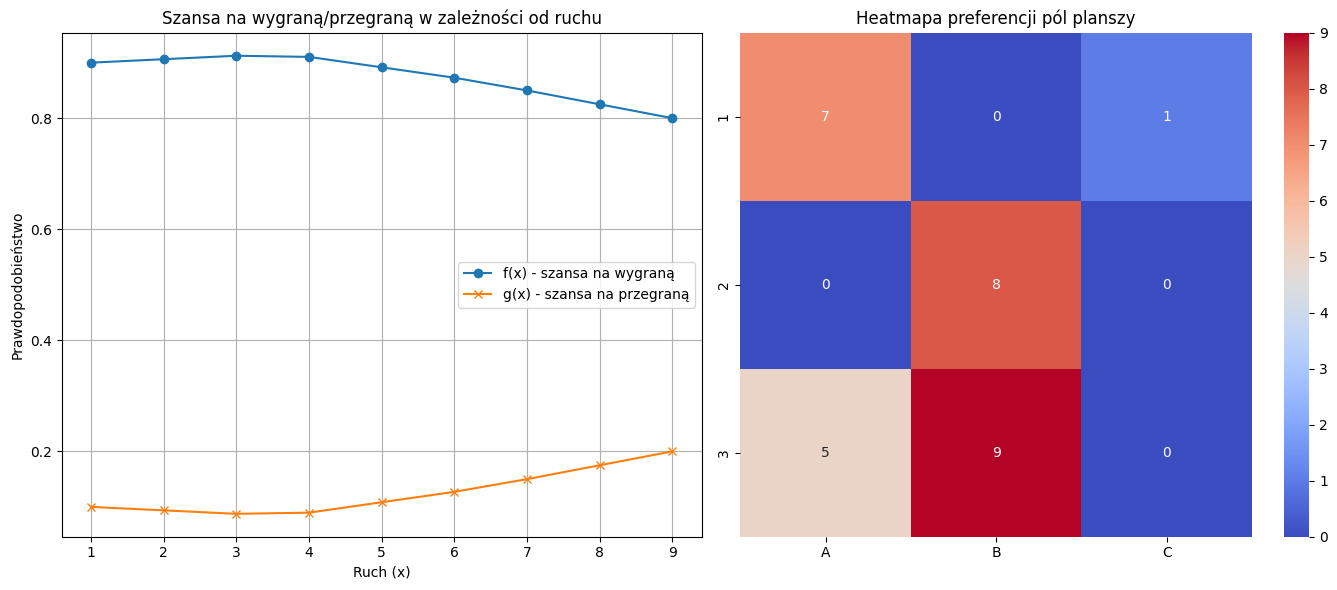

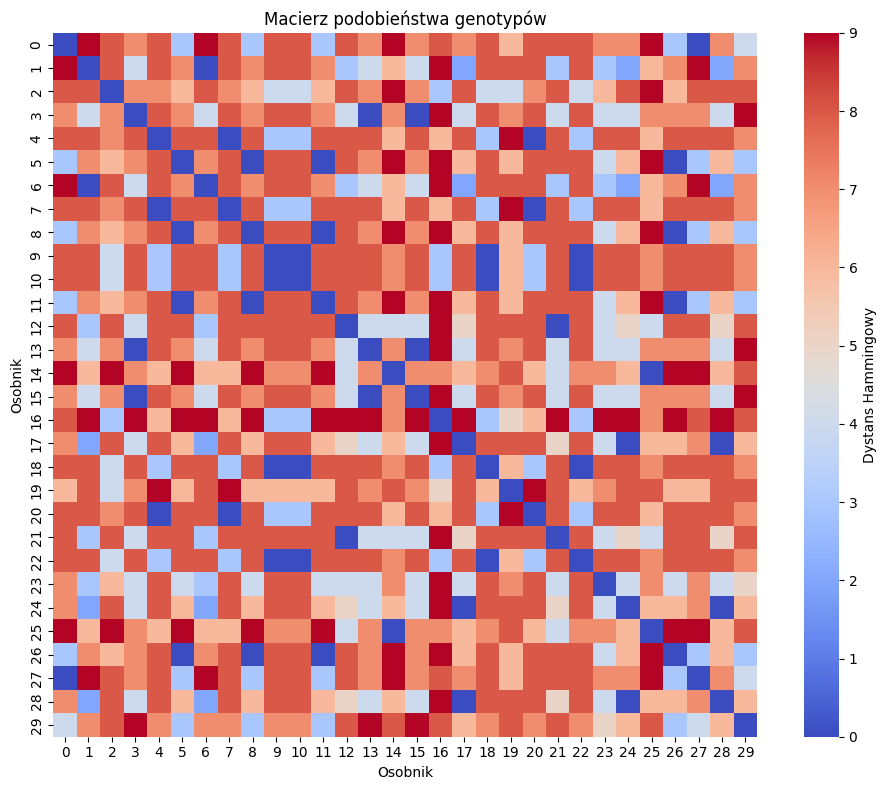

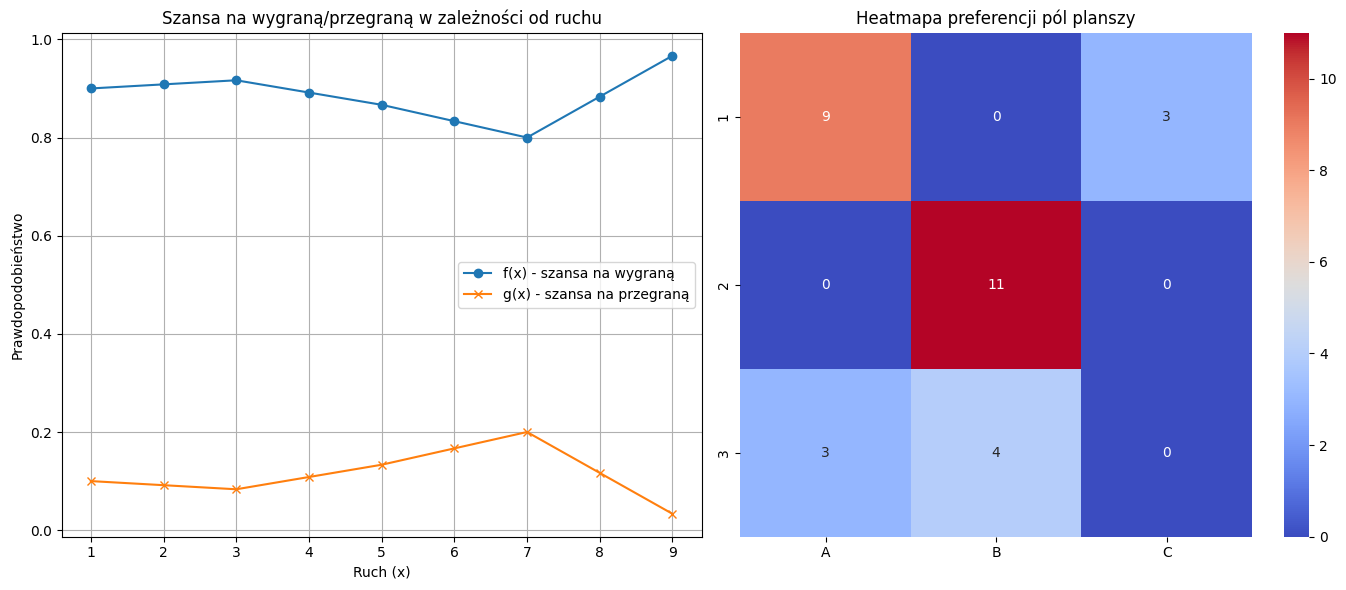

In [5]:

fitness_history = []
preference_census = []

for gen in range(5):
    offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.2)
    fits = list(map(toolbox.evaluate, offspring))
    for ind, fit in zip(offspring, fits):
        ind.fitness.values = fit
    pop = toolbox.select(offspring, k=len(pop))
    plot_genome_similarity(pop)
    # --- Statystyki generacyjne ---
    fitness_vals = [ind.fitness.values[0] for ind in pop]
    fitness_history.append(fitness_vals)

    # Preferencje strategii dla heatmapy (agregujemy "pierwsze ruchy")
    
    first_move_counts = np.zeros(9)
    for ind in pop:
        first_move_counts[ind[0]] += 1
    preferences = first_move_counts.reshape(3, 3)
    preference_census.append(preferences)
    game_predictions(
        tickable.helpers.make_histogram(fitness_history), 
        preference_census[-1]
    )



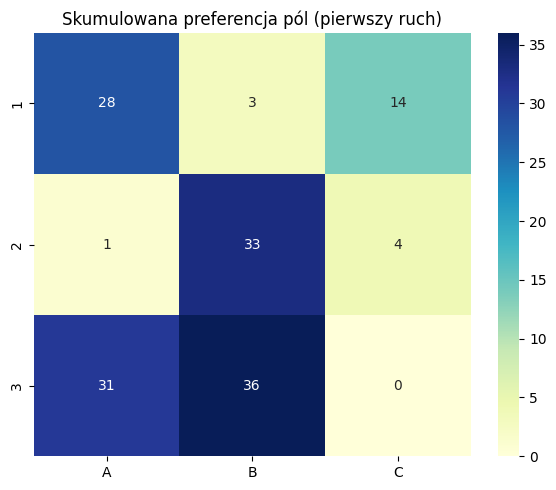

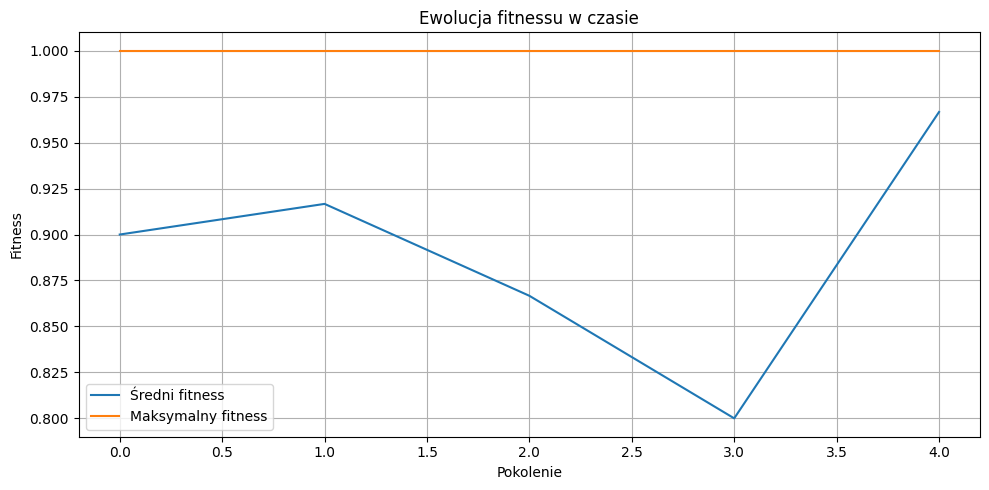

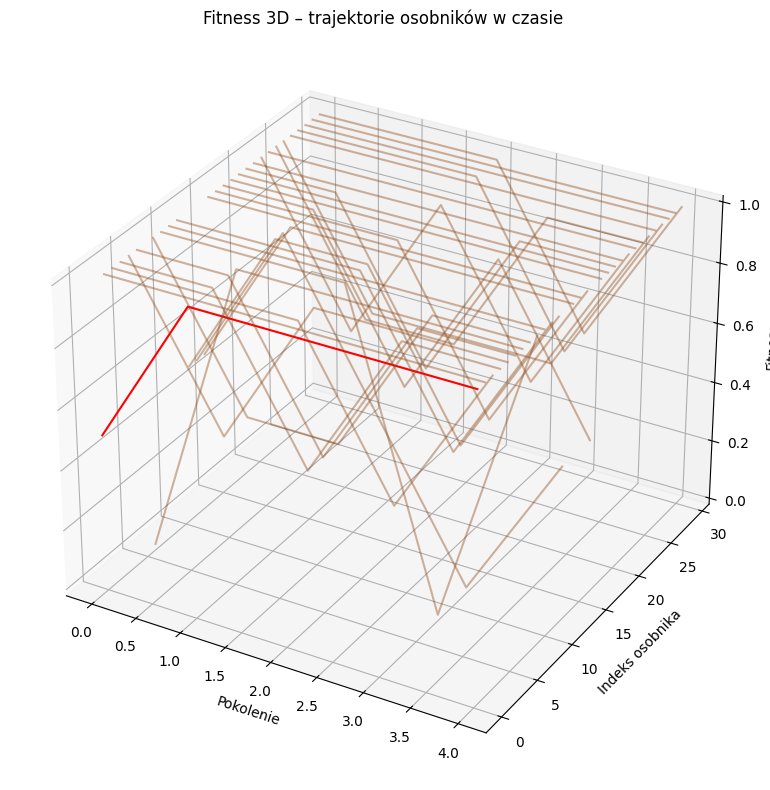

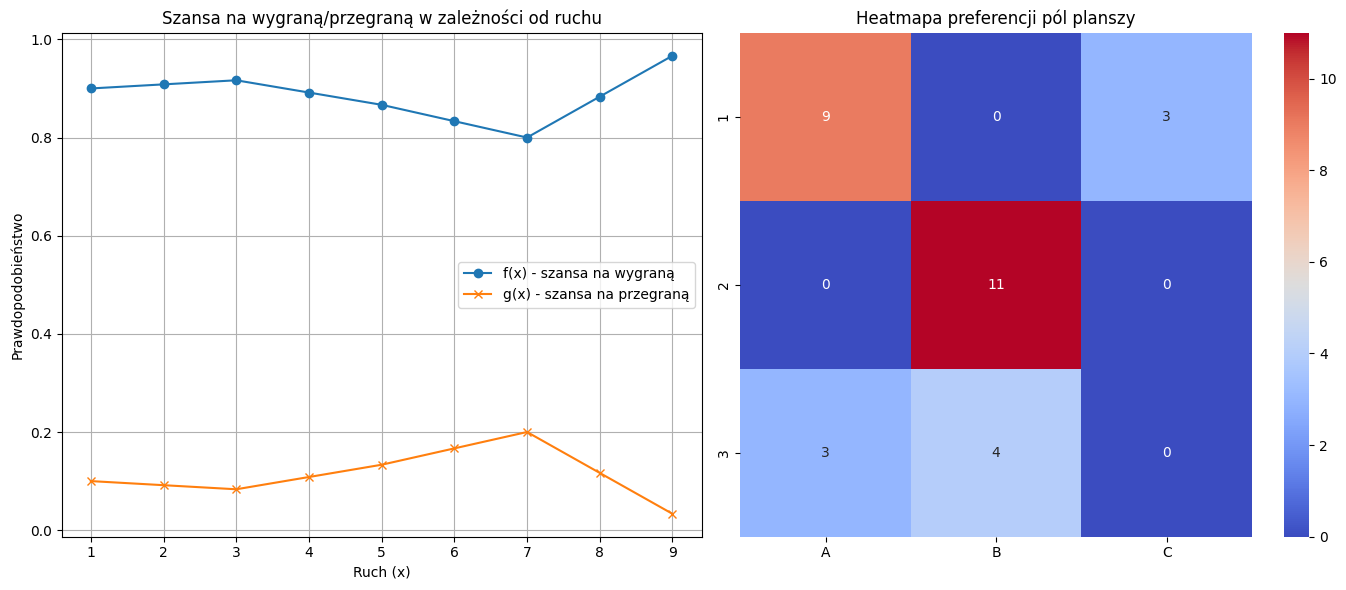

In [6]:
#final_prefs = preference_census[-1]

# --- Narzędzie wizualizacyjne ---

plot_first_move_preference(preference_census)

plot_fitness_over_time(fitness_history)

plot_fitness_3d(fitness_history)

game_predictions(
    tickable.helpers.make_histogram(fitness_history), 
    preference_census[-1]
)



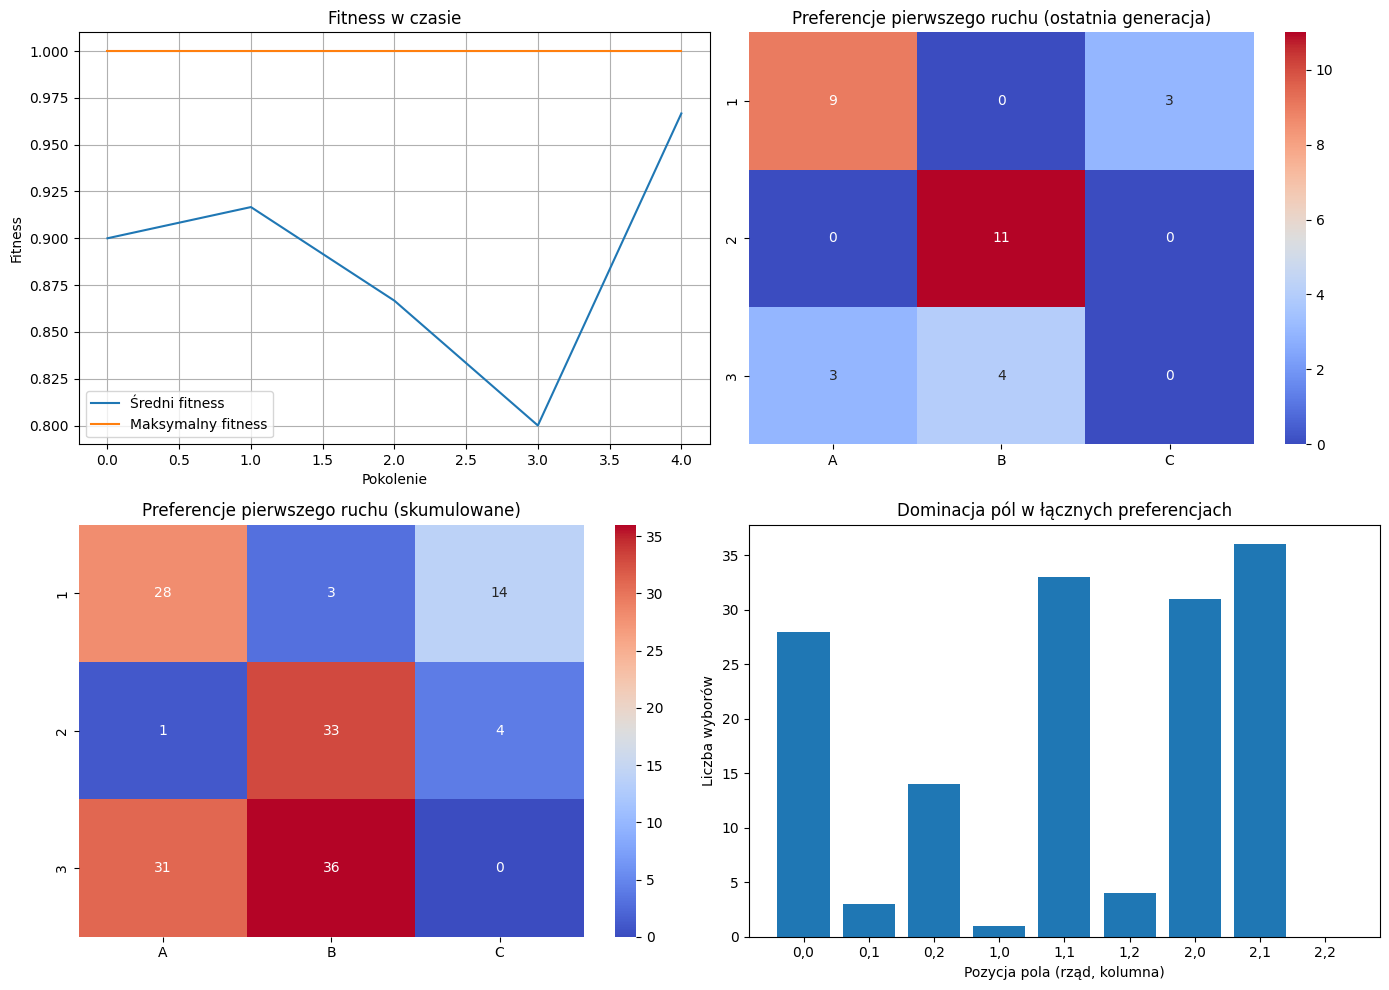

In [7]:
plot_all_statistics(fitness_history,preference_census)

games_record.length =  150
defaultdict(<function build_tactic_index.<locals>.<lambda> at 0x7ce01feb23e0>, {})


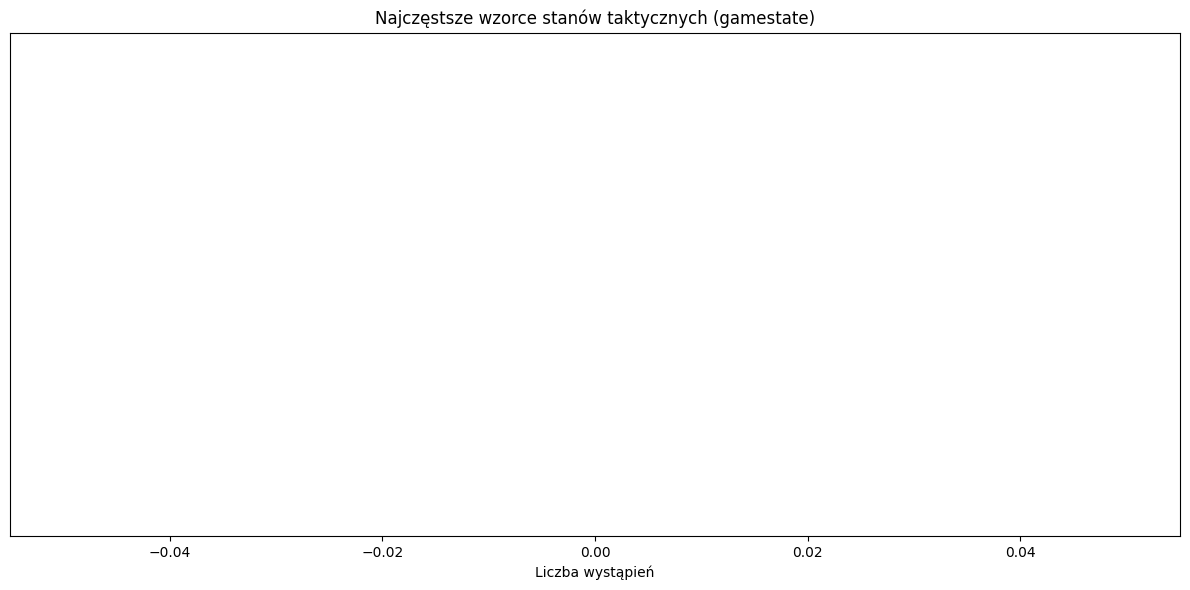

In [ ]:


print("games_record.length = ", len(games_record))

tactical_lib = build_tactic_index(games_record)

#print(tactical_lib)
plot_tactic_histogram(tactical_lib)
